# Content Page

## [Brief Summary](#Aviation_Accident_Analysis)


## [Data Cleaning](#Load_data_into_dataframe)


## [Exploratory Analysis](#Exploratory_analysis)


## [Machine Learning](#Models)


## [Limitations](#Limitation)


## [Future Improvements](#Future_Improvements)


## [Overall Conclusion/ Key takeaways](#Overall_Conclusion/_Key_takeaways)

<a id='Aviation_Accident_Analysis'></a>
# Aviation Accident Analysis

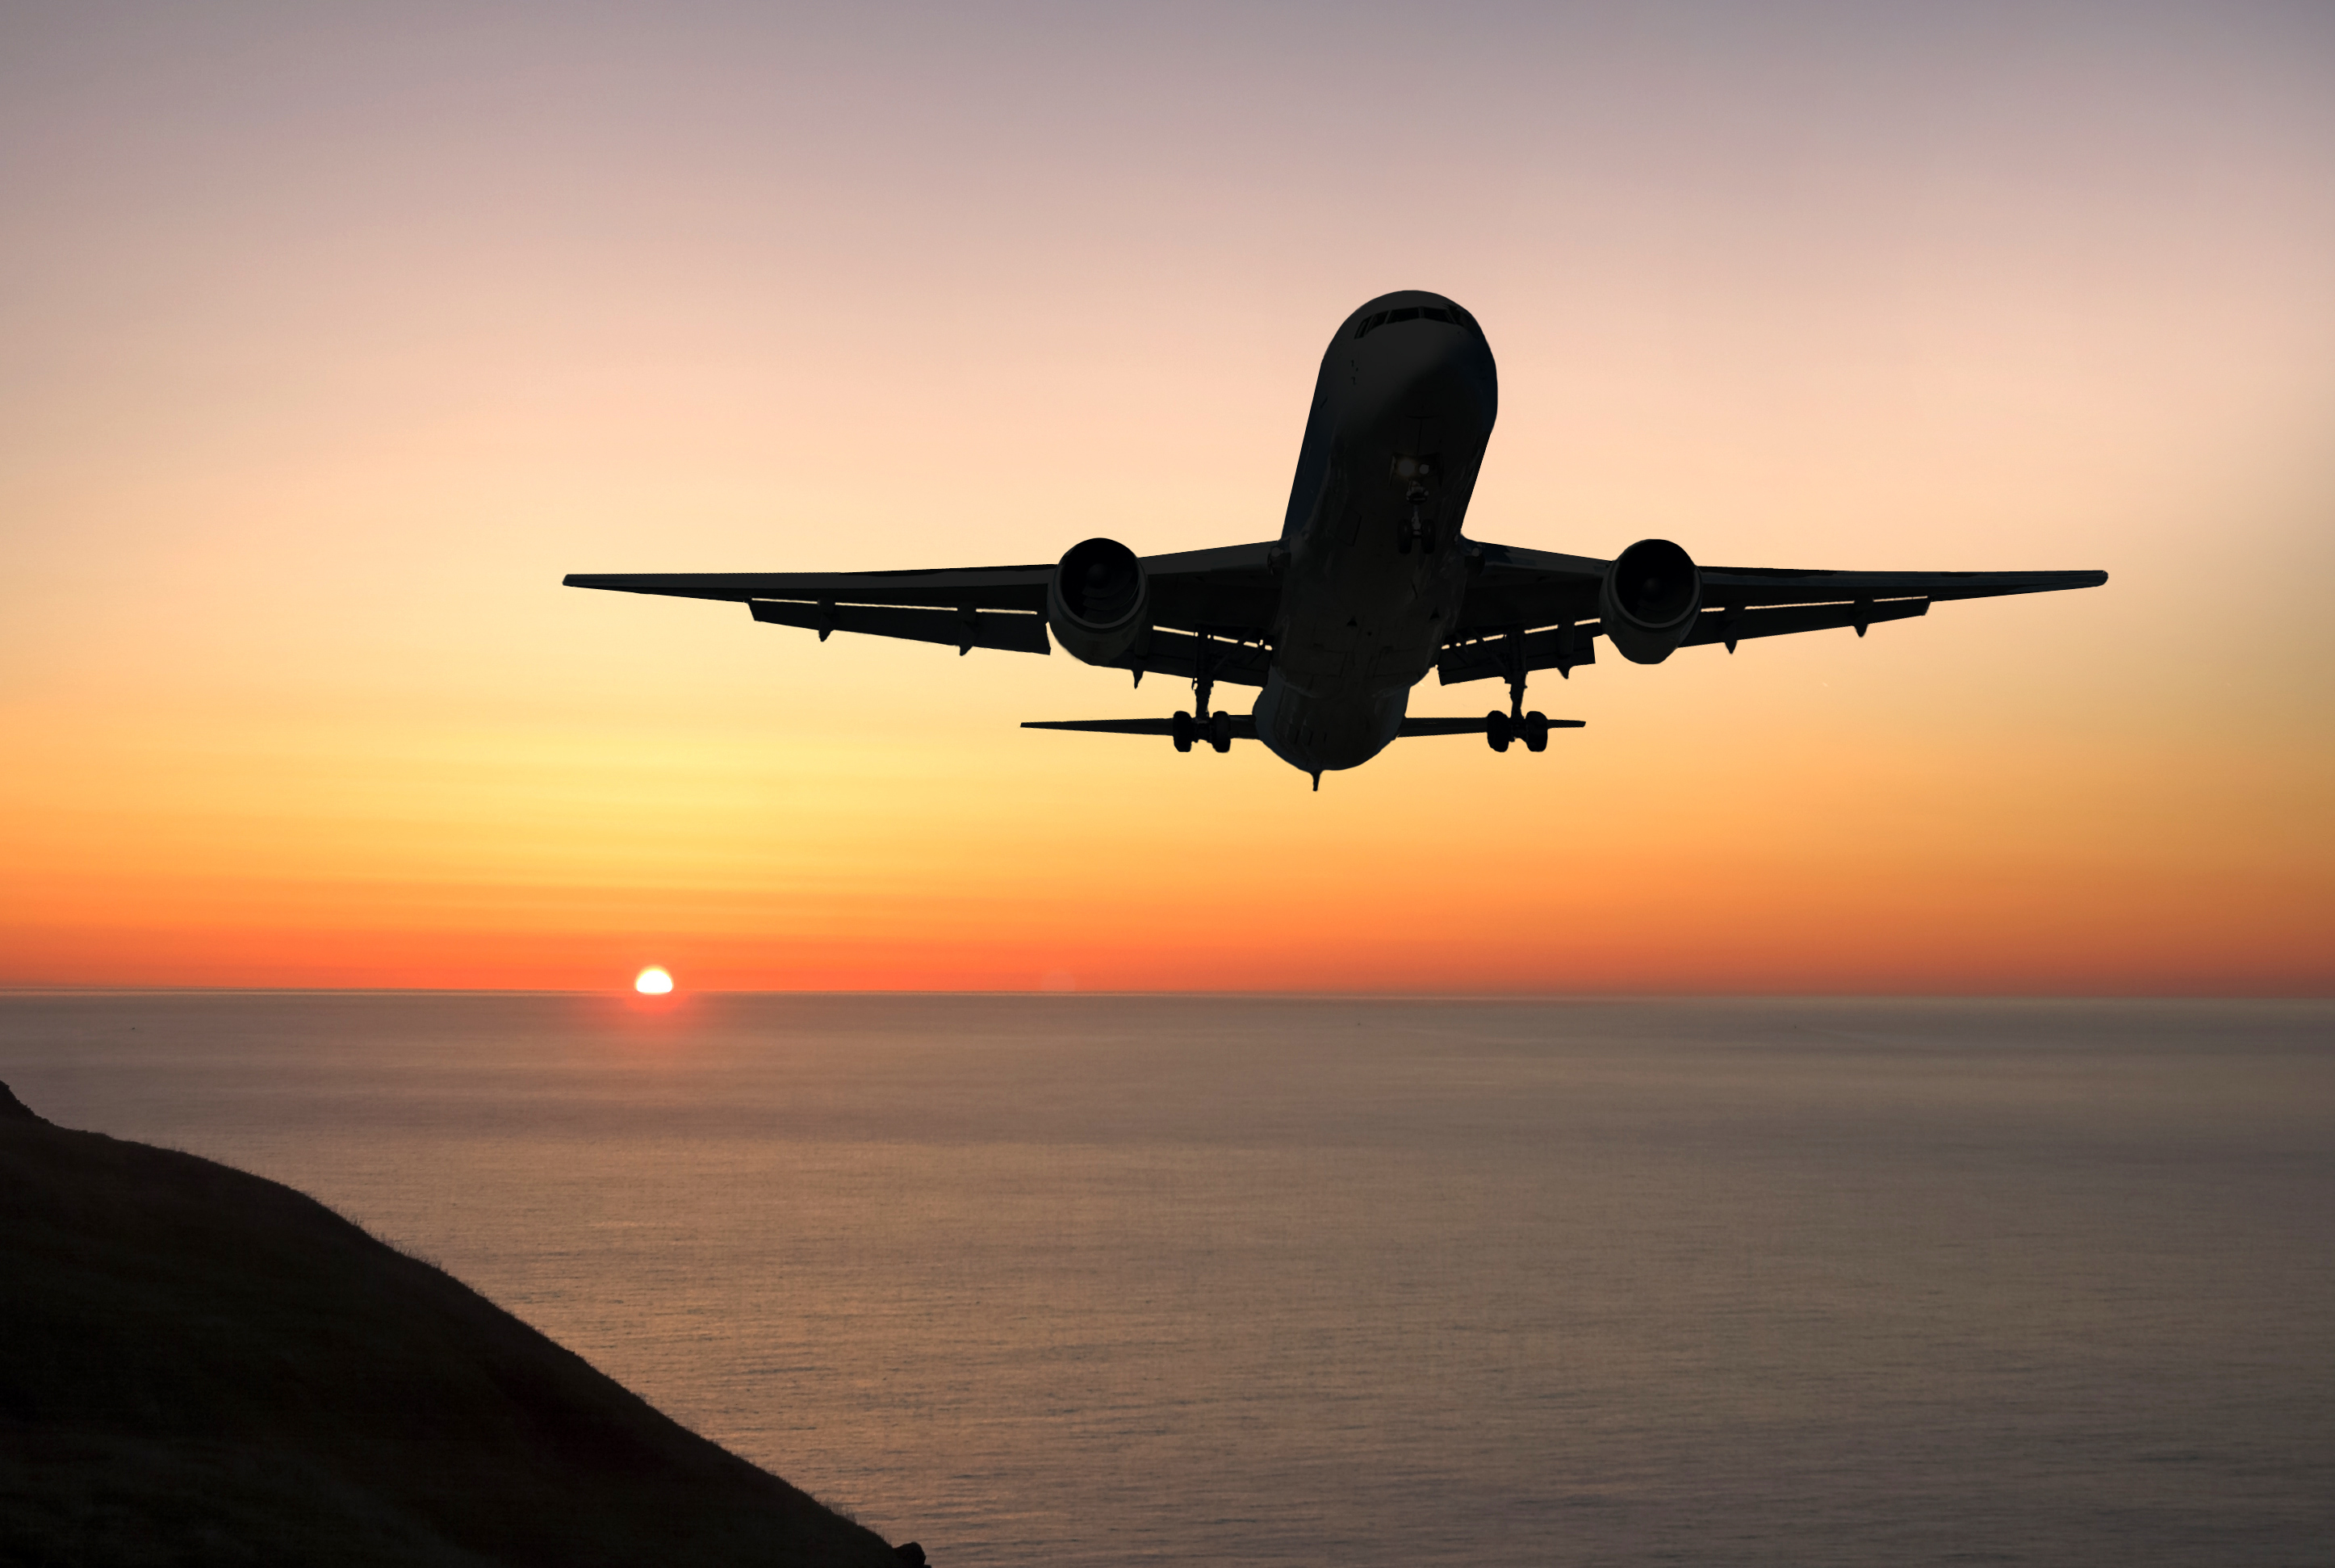
https://all-free-download.com/free-photos/download/aircraft-flying-01-hd-picture_168626.html
<br>
#### Air travel has been a big part of the twentieth century. The 4.3 billion airline passengers carried in 2018 are expected to grow to about 10 billion by 2040, and the number of departures is projected to rise to some 90 million in 2040. So, aircraft safety has became a hot topic these past few years. The three groups of people affected the most by this boom are the aircraft manufacturers, airport personnels (eg. pilots, air traffic controllers), and passengers. Each group has a different objective, as illustrated below:
<br>

1. Aircraft manufacturers: How safe and reliable are our machines?
    - They are concerned about their reputation and design of the aircraft. So, they need information on the aftermath of different aircraft accidents to know which are the better designs. From there, they can better enchance their aircraft designs.
    
    
2. Airport personnels: Should the aircraft takeoff given the current situation?
    - They have access to a lot more information than the other groups. Hence, they will have the most updated information on the ground. So, they need a reliable model, making full use of all information available to best determine the optimal course of action.
    
    
3. Passengers: 
    1. Should I be concerned about overall flight safety?
        - They are concerned about how safe  it is to fly in general, because they will likely take a plane in the future.
    2. I'm about to take a plane, is it safe to fly today?  
        - They are concerned about how safe it is to fly given what they can see. As they do not have ready access to much info, they need to a single, easy to recognise factor to help them make that decision.

<br>
With these questions in mind, the team decided to tackle these problems using the data science techniques we've learned from our course to hopefully, shed some light.
<br>

https://www.icao.int/annual-report-2018/Pages/the-world-of-air-transport-in-2018.aspx

The objective of this case analysis is to: 
<br>

1. __Analyse the data, and draw out any interesting or concerning findings that may be of importance to aircraft manufacturers.__
2. __Develop and evaluate machine learning models to forcast the likelihood of severe injuries during an aircraft accident so as to help flight airport personnels make more informed decisions.__
3. __Determine what is the most significant factor that affects aircraft safety to help passengers make quick, on the spot, decisions.__

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sb.set()

In [2]:
# from google.colab import files
# uploaded = files.upload()

<a id='Load_data_into_dataframe'></a>
# Load data into dataframe

In [3]:
maindf = pd.read_csv('AviationData.csv', encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', 31)

In [4]:
#basic summary
print("Data type : ", type(maindf))
print("Data dims : ", maindf.shape)
print()
print(maindf.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (84262, 31)

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.Flight          object
Air.Carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weath

# Data Preparation

#### Dropped non-US rows, because there's too little of them

In [5]:
# Making a new dataframe containing just US flights
USData = maindf[maindf['Country']=='United States']
USData = USData.drop(columns = 'Country')
print(USData.shape)
print(USData.count())
USData.head()

(78849, 30)
Event.Id                  78849
Investigation.Type        78844
Accident.Number           78849
Event.Date                78849
Location                  78820
Latitude                  28422
Longitude                 28412
Airport.Code              46839
Airport.Name              49427
Injury.Severity           78849
Aircraft.Damage           76937
Aircraft.Category         24580
Registration.Number       78680
Make                      78826
Model                     78810
Amateur.Built             78748
Number.of.Engines         77057
Engine.Type               77477
FAR.Description           24674
Schedule                   9811
Purpose.of.Flight         76569
Air.Carrier                4004
Total.Fatal.Injuries      53821
Total.Serious.Injuries    52556
Total.Minor.Injuries      53975
Total.Uninjured           67191
Weather.Condition         78395
Broad.Phase.of.Flight     75804
Report.Status             78849
Publication.Date          66510
dtype: int64


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.Damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",39.128611,-123.715833,LLR,Little River,Non-Fatal,Substantial,Airplane,N7095M,Cessna,175,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",38.846111,-94.736111,OJC,Johnson County Executive,Fatal(2),Destroyed,Airplane,N602TF,Mooney,M20S,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",64.666945,-148.133334,NaN,NaN,Non-Fatal,Substantial,Airplane,N4667C,Cessna,170,No,1.0,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",32.365556,-97.645000,NaN,NaN,Non-Fatal,Substantial,Airplane,N519RV,Vans,RV 10,Yes,NaN,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,2019-12-28,"Missoula, MT",NaN,NaN,MSO,NaN,Unavailable,Substantial,NaN,N4476B,Cessna,170,No,1.0,NaN,Public Aircraft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,03/01/2020


In [6]:
# Drop variables with too many missing values
for column in USData:
    count = USData[column].count()
    if count < 30000:
        USData = USData.drop(columns = column)
    else:
        print(column)

Event.Id
Investigation.Type
Accident.Number
Event.Date
Location
Airport.Code
Airport.Name
Injury.Severity
Aircraft.Damage
Registration.Number
Make
Model
Amateur.Built
Number.of.Engines
Engine.Type
Purpose.of.Flight
Total.Fatal.Injuries
Total.Serious.Injuries
Total.Minor.Injuries
Total.Uninjured
Weather.Condition
Broad.Phase.of.Flight
Report.Status
Publication.Date


In [7]:
# Drop variables that have statistical significance, but no practical significance
USData = USData.drop(columns = ['Aircraft.Damage', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', \
                               'Total.Minor.Injuries', 'Total.Uninjured'])

In [8]:
# Drop variables that have no statistical or practical significance
USData = USData.drop(columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Airport.Code', 'Airport.Name', \
                               'Registration.Number', 'Make', 'Model', 'Report.Status', 'Publication.Date'])

In [9]:
USData_raw = USData

In [10]:
# Replace 'Event.Date' with 'Weekend?', 'Month', 'Year' to give it more practical significance
USData['Event.Date'] = pd.to_datetime(USData['Event.Date'])

USData['Weekend?'] = ((USData['Event.Date'].dt.dayofweek) // 5 == 1).astype(bool)

USData['Month'] = USData['Event.Date'].dt.month_name()

USData['Year'] = USData['Event.Date'].dt.year

In [11]:
# Resorting Data
USData = USData.sort_values(by=['Event.Date'])

USData = USData.drop(columns = 'Event.Date')

In [12]:
# States dictionary from https://code.activestate.com/recipes/580661-states-to-regions/
states = {
    'AK': 'Other',
    'AL': 'South',
    'AR': 'South',
    'AS': 'Other',
    'AZ': 'West',
    'CA': 'West',
    'CO': 'West',
    'CT': 'North East',
    'DC': 'North East',
    'DE': 'North East',
    'FL': 'South',
    'GA': 'South',
    'GU': 'Other',
    'HI': 'Other',
    'IA': 'Mid West',
    'ID': 'West',
    'IL': 'Mid West',
    'IN': 'Mid West',
    'KS': 'Mid West',
    'KY': 'South',
    'LA': 'South',
    'MA': 'North East',
    'MD': 'North East',
    'ME': 'North East',
    'MI': 'West',
    'MN': 'Mid West',
    'MO': 'Mid West',
    'MP': 'Other',
    'MS': 'South',
    'MT': 'West',
    'NA': 'Other',
    'NC': 'South',
    'ND': 'Mid West',
    'NE': 'West',
    'NH': 'North East',
    'NJ': 'North East',
    'NM': 'West',
    'NV': 'West',
    'NY': 'North East',
    'OH': 'Mid West',
    'OK': 'South',
    'OR': 'West',
    'PA': 'North East',
    'PR': 'Other',
    'RI': 'North East',
    'SC': 'South',
    'SD': 'Mid West',
    'TN': 'South',
    'TX': 'South',
    'UT': 'West',
    'VA': 'South',
    'VI': 'Other',
    'VT': 'North East',
    'WA': 'West',
    'WI': 'Mid West',
    'WV': 'South',
    'WY': 'West',
    'Others': 'Other'
}

In [13]:
# Replaced 'Location' with 'Region' to give it more practical significance
USData['Region'] = USData['Location'].str[-2:].map(states)
USData = USData[USData['Region'].isnull() == False]
USData = USData.drop(columns = 'Location')

In [14]:
# Check that all variables used are there
print(USData)

      Injury.Severity Amateur.Built  Number.of.Engines    Engine.Type  \
84261        Fatal(2)            No                1.0  Reciprocating   
84260        Fatal(4)            No                1.0  Reciprocating   
84259        Fatal(3)            No                1.0  Reciprocating   
84258        Fatal(2)            No                1.0  Reciprocating   
84257        Fatal(1)            No                NaN            NaN   
...               ...           ...                ...            ...   
4         Unavailable            No                1.0            NaN   
3           Non-Fatal           Yes                NaN            NaN   
2           Non-Fatal            No                1.0            NaN   
1            Fatal(2)            No                1.0  Reciprocating   
0           Non-Fatal            No                1.0  Reciprocating   

      Purpose.of.Flight Weather.Condition Broad.Phase.of.Flight  Weekend?  \
84261          Personal               UNK     

# Regroup variables and remove Null Values to give it more practial significance

#### Injury Severity

In [15]:
# Check for unique values
print("Breakdown: ")
print(USData["Injury.Severity"].value_counts())

# Check for null values 
print("total: ", USData["Injury.Severity"].value_counts().sum())

Breakdown: 
Non-Fatal      61850
Fatal(1)        7534
Fatal(2)        4271
Incident        2340
Fatal(3)        1255
Fatal(4)         836
Fatal(5)         223
Fatal(6)         131
Unavailable      106
Fatal(7)          43
Fatal(8)          31
Fatal(10)         19
Fatal(9)          14
Fatal(14)          7
Fatal(11)          7
Fatal(12)          5
Fatal(13)          3
Fatal(25)          3
Fatal(17)          3
Fatal(18)          3
Fatal(16)          2
Fatal(20)          2
Fatal(82)          2
Fatal(34)          2
Fatal(23)          2
Fatal(64)          1
Fatal(19)          1
Fatal(153)         1
Fatal(78)          1
Fatal(88)          1
Fatal(228)         1
Fatal(28)          1
Fatal(230)         1
Fatal(21)          1
Fatal(92)          1
Fatal(15)          1
Fatal(49)          1
Fatal(31)          1
Fatal(37)          1
Fatal(50)          1
Fatal(73)          1
Fatal(44)          1
Fatal(132)         1
Fatal(29)          1
Fatal(265)         1
Fatal(43)          1
Fatal(70)          1
F

In [16]:
# Regrouping values
USData.loc[USData['Injury.Severity'].str[:5] == 'Fatal', 'Injury.Severity'] = 'Fatal'
USData.loc[USData['Injury.Severity'] == 'Incident', 'Injury.Severity'] = 'Non-Fatal'

# Removing null values
USData = USData[USData['Injury.Severity'] != 'Unavailable']

In [17]:
# Check for new unique values
print("Breakdown: ")
print(USData["Injury.Severity"].value_counts())

# Check for null values 
print("total: ", USData["Injury.Severity"].value_counts().sum())

Breakdown: 
Non-Fatal    64190
Fatal        14427
Name: Injury.Severity, dtype: int64
total:  78617


#### Amateur Built

In [18]:
# Check for unique values
print("Breakdown: ")
print(USData["Amateur.Built"].value_counts())

# Check for null values 
print("total: ", USData["Amateur.Built"].value_counts().sum())

Breakdown: 
No     70587
Yes     7933
Name: Amateur.Built, dtype: int64
total:  78520


In [19]:
#Remove null values
USData = USData[USData["Amateur.Built"].isnull() == False]

In [20]:
# Check for unique values
print("Breakdown: ")
print(USData["Amateur.Built"].value_counts())

# Check for null values 
print("total: ", USData["Amateur.Built"].value_counts().sum())

Breakdown: 
No     70587
Yes     7933
Name: Amateur.Built, dtype: int64
total:  78520


#### Number of Engines

In [21]:
# Check for unique values
print("breakdown:")
print(USData["Number.of.Engines"].value_counts())

# Check for null values
print("total: ", USData["Number.of.Engines"].value_counts().sum())

breakdown:
1.0    65330
2.0     9674
0.0     1045
3.0      425
4.0      328
8.0        1
Name: Number.of.Engines, dtype: int64
total:  76803


Since Number of Engines is a numeric variable, and every aircraft has to have at least 1 engine, we can __impute__ the missing data

In [22]:
# Impute missing values
USData['Number.of.Engines'] = USData['Number.of.Engines'].fillna( round(USData['Number.of.Engines'].mean()) )

# Reassigning data type
USData = USData.astype({'Number.of.Engines': 'int64'})

In [23]:
# Check for new unique values
print("breakdown:")
print(USData["Number.of.Engines"].value_counts())

# Check for null values
print("total: ", USData["Number.of.Engines"].value_counts().sum())

breakdown:
1    67047
2     9674
0     1045
3      425
4      328
8        1
Name: Number.of.Engines, dtype: int64
total:  78520


#### Engine.Type

In [24]:
# Check for unique values
print("breakdown:")
print(USData["Engine.Type"].value_counts())

# Check for null values
print("total: ", USData["Engine.Type"].value_counts().sum())

breakdown:
Reciprocating       66936
Turbo Shaft          3163
Turbo Prop           3099
Turbo Fan            2006
Unknown              1377
Turbo Jet             665
None                   16
Electric                6
REC, TJ, TJ             2
TJ, REC, REC, TJ        1
REC, ELEC               1
REC, TJ, REC, TJ        1
Hybrid Rocket           1
Name: Engine.Type, dtype: int64
total:  77274


In [25]:
# Regrouping values

# Everything with turbo in their name to type 'Turbo'
USData.loc[USData['Engine.Type'].str[:5] == 'Turbo', 'Engine.Type'] = 'Turbo'
USData.loc[USData['Engine.Type'] == 'None', 'Engine.Type'] = 'Others'

# Everything else, other than 'Reciprocating', to type 'Others'
USData.loc[USData['Engine.Type'] == 'Electric', 'Engine.Type'] = 'Others'
USData.loc[USData['Engine.Type'] == 'REC, TJ, TJ', 'Engine.Type'] = 'Others'
USData.loc[USData['Engine.Type'] == 'REC, TJ, REC, TJ', 'Engine.Type'] = 'Others'
USData.loc[USData['Engine.Type'] == 'TJ, REC, REC, TJ', 'Engine.Type'] = 'Others'
USData.loc[USData['Engine.Type'] == 'REC, ELEC', 'Engine.Type'] = 'Others'
USData.loc[USData['Engine.Type'] == 'Hybrid Rocket', 'Engine.Type'] = 'Others'

# Since every aircraft has to have an engine, it doesnt make sense to delete the null values
# Replace null values with type 'Unknown'
USData['Engine.Type'] = USData['Engine.Type'].fillna(value='Unknown')

In [26]:
# Check for new unique values
print("breakdown:")
print(USData["Engine.Type"].value_counts())

# Check for null values
print("total: ", USData["Engine.Type"].value_counts().sum())

breakdown:
Reciprocating    66936
Turbo             8933
Unknown           2623
Others              28
Name: Engine.Type, dtype: int64
total:  78520


####  Purpose.of.Flight

In [27]:
# Check for unique values
print("breakdown:")
print(USData["Purpose.of.Flight"].value_counts())

# Check for null values
print("total: ", USData["Purpose.of.Flight"].value_counts().sum())

breakdown:
Personal                     46222
Instructional                 9926
Unknown                       5725
Aerial Application            4478
Business                      3794
Positioning                   1483
Other Work Use                1096
Ferry                          719
Public Aircraft                665
Aerial Observation             647
Executive/Corporate            484
Flight Test                    350
Skydiving                      166
Air Race/Show                  148
Banner Tow                      93
External Load                   90
Public Aircraft - Federal       89
Public Aircraft - Local         69
Public Aircraft - State         60
Glider Tow                      50
Firefighting                    18
Air Drop                         9
Name: Purpose.of.Flight, dtype: int64
total:  76381


In [28]:
# Flight purpose dictionary
purpose = {
    'Personal': "General Aviation",
    'Instructional': 'Others' ,
    'Unknown': 'Unknown' ,             
    'Aerial Application': "Others" ,  
    'Business': "General Aviation" ,            
    'Positioning': 'Others' ,         
    'Other Work Use': "General Aviation" ,      
    'Ferry': "General Aviation" ,               
    'Public Aircraft': "General Aviation" ,     
    'Aerial Observation': 'Others' ,
    'Executive/Corporate': "General Aviation" , 
    'Flight Test': 'Others' ,         
    'Skydiving': 'Others' ,           
    'Air Race/Show': 'Others' ,       
    'Banner Tow': 'Others' ,          
    'External Load': 'Others' ,       
    'Public Aircraft - Federal': "General Aviation" ,
    'Public Aircraft - Local': "General Aviation" ,
    'Public Aircraft - State': "General Aviation" ,
    'Glider Tow': 'Others' ,          
    'Firefighting': 'Others' ,        
    'Others': 'Others' ,              
    'Air Drop': 'Others'            
}

In [29]:
# Regrouping categories
USData['Purpose.of.Flight'] = USData['Purpose.of.Flight'].map(purpose)

# Since every flight has to have a purpose, it doesnt make sense to delete the null values
# Replace null values with type 'Unknown'
USData.loc[USData['Purpose.of.Flight'].isnull() == True, 'Purpose.of.Flight'] = 'Unknown'

In [30]:
# Check for new unique values
print("breakdown:")
print(USData["Purpose.of.Flight"].value_counts())

# Check for null values
print("total: ", USData["Purpose.of.Flight"].value_counts().sum())

breakdown:
General Aviation    53198
Others              17458
Unknown              7864
Name: Purpose.of.Flight, dtype: int64
total:  78520


#### Weather.Condition

In [31]:
# Check for unique values
print("breakdown:")
print(USData["Weather.Condition"].value_counts())

# Check for null values
print("total: ", USData["Weather.Condition"].value_counts().sum())

breakdown:
VMC    72091
IMC     5466
UNK      624
Name: Weather.Condition, dtype: int64
total:  78181


In [32]:
# Weather condition dictionary
condition = {
    'VMC': 'Good',
    'IMC': 'Bad',
    'UNK': 'UNK'
}

In [33]:
# Rephrased weather conditions with more understandable labels
USData['Weather.Condition'] = USData['Weather.Condition'].map(condition)

# Replaced null values with Unknown (UNK)
USData.loc[USData['Weather.Condition'].isnull() == True, 'Weather.Condition'] = 'UNK'

In [34]:
# Check for new unique values
print("breakdown:")
print(USData["Weather.Condition"].value_counts())

# Check for null values
print("total: ", USData["Weather.Condition"].value_counts().sum())

breakdown:
Good    72091
Bad      5466
UNK       963
Name: Weather.Condition, dtype: int64
total:  78520


#### Broad.Phase.of.Flight 

In [35]:
# Check for unique values
print("breakdown:")
print(USData["Broad.Phase.of.Flight"].value_counts())

# Check for null values
print("total: ", USData["Broad.Phase.of.Flight"].value_counts().sum())

breakdown:
LANDING        20318
TAKEOFF        15870
CRUISE         10682
MANEUVERING    10149
APPROACH        7989
TAXI            2417
CLIMB           2290
DESCENT         2248
GO-AROUND       1675
STANDING        1238
UNKNOWN          582
OTHER            156
Name: Broad.Phase.of.Flight, dtype: int64
total:  75614


In [36]:
# Phase of flight dictionary 
phase = {
    'LANDING': 'LANDING' ,        
    'TAKEOFF': 'TAKEOFF' ,        
    'CRUISE': 'CRUISE' ,         
    'MANEUVERING': 'MANEUVERING' ,    
    'APPROACH': 'LANDING' ,       
    'TAXI': 'TAKEOFF' ,           
    'CLIMB': 'TAKEOFF' ,          
    'DESCENT': 'LANDING' ,        
    'GO-AROUND': 'GO-AROUND',      
    'STANDING': 'STANDING' ,       
    'UNKNOWN': 'UNKNOWN' ,        
    'OTHER': 'OTHER',
    'Others': 'OTHER'         
}

In [37]:
# Regrouped categories
USData['Broad.Phase.of.Flight'] = USData['Broad.Phase.of.Flight'].map(phase)

# Replaced null values with 'OTHER'
USData.loc[USData['Broad.Phase.of.Flight'].isnull() == True, 'Broad.Phase.of.Flight'] = 'OTHER'

In [38]:
# Check for new unique values
print("breakdown:")
print(USData["Broad.Phase.of.Flight"].value_counts())

# Check for null values
print("total: ", USData["Broad.Phase.of.Flight"].value_counts().sum())

breakdown:
LANDING        30555
TAKEOFF        20577
CRUISE         10682
MANEUVERING    10149
OTHER           3062
GO-AROUND       1675
STANDING        1238
UNKNOWN          582
Name: Broad.Phase.of.Flight, dtype: int64
total:  78520


# Final check to make sure all data are cleaned properly

In [39]:
# Check how the dataframe looks like
print(USData)

      Injury.Severity Amateur.Built  Number.of.Engines    Engine.Type  \
84261           Fatal            No                  1  Reciprocating   
84260           Fatal            No                  1  Reciprocating   
84259           Fatal            No                  1  Reciprocating   
84258           Fatal            No                  1  Reciprocating   
84257           Fatal            No                  1        Unknown   
...               ...           ...                ...            ...   
5               Fatal            No                  2          Turbo   
3           Non-Fatal           Yes                  1        Unknown   
2           Non-Fatal            No                  1        Unknown   
1               Fatal            No                  1  Reciprocating   
0           Non-Fatal            No                  1  Reciprocating   

      Purpose.of.Flight Weather.Condition Broad.Phase.of.Flight  Weekend?  \
84261  General Aviation               UNK     

In [40]:
# Check to make sure no null values
for column in USData:
    print(column)
    print('non-null values: ', USData[column].isnull().count())
    print()

Injury.Severity
non-null values:  78520

Amateur.Built
non-null values:  78520

Number.of.Engines
non-null values:  78520

Engine.Type
non-null values:  78520

Purpose.of.Flight
non-null values:  78520

Weather.Condition
non-null values:  78520

Broad.Phase.of.Flight
non-null values:  78520

Weekend?
non-null values:  78520

Month
non-null values:  78520

Year
non-null values:  78520

Region
non-null values:  78520



<a id='Exploratory_analysis'></a>
# Exploratory Analysis

In [41]:
# Check for number of unique values for each variable
print('Counts\n')
for column in USData:
    print(USData[column].value_counts())
    print()

Counts

Non-Fatal    64108
Fatal        14412
Name: Injury.Severity, dtype: int64

No     70587
Yes     7933
Name: Amateur.Built, dtype: int64

1    67047
2     9674
0     1045
3      425
4      328
8        1
Name: Number.of.Engines, dtype: int64

Reciprocating    66936
Turbo             8933
Unknown           2623
Others              28
Name: Engine.Type, dtype: int64

General Aviation    53198
Others              17458
Unknown              7864
Name: Purpose.of.Flight, dtype: int64

Good    72091
Bad      5466
UNK       963
Name: Weather.Condition, dtype: int64

LANDING        30555
TAKEOFF        20577
CRUISE         10682
MANEUVERING    10149
OTHER           3062
GO-AROUND       1675
STANDING        1238
UNKNOWN          582
Name: Broad.Phase.of.Flight, dtype: int64

False    49733
True     28787
Name: Weekend?, dtype: int64

July         9587
August       8936
June         8578
May          7641
September    7369
April        6500
October      6079
March        5870
November     

In [42]:
# Basic Analysis of each variable - eg. highest count
print('Counts\n')
for column in USData:
    if (column == 'Year'):
        print(USData[column].astype('category').describe())
        print()
        continue
    print(USData[column].describe())
    print()

Counts

count         78520
unique            2
top       Non-Fatal
freq          64108
Name: Injury.Severity, dtype: object

count     78520
unique        2
top          No
freq      70587
Name: Amateur.Built, dtype: object

count    78520.000000
mean         1.133342
std          0.422617
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number.of.Engines, dtype: float64

count             78520
unique                4
top       Reciprocating
freq              66936
Name: Engine.Type, dtype: object

count                78520
unique                   3
top       General Aviation
freq                 53198
Name: Purpose.of.Flight, dtype: object

count     78520
unique        3
top        Good
freq      72091
Name: Weather.Condition, dtype: object

count       78520
unique          8
top       LANDING
freq        30555
Name: Broad.Phase.of.Flight, dtype: object

count     78520
unique        2
top       False
freq      4

# Solving the manufacturer and passenger problems:
1. Aircraft manufacturers: How safe and reliable are our machines?
2. Passengers: Should I be concerned about overall flight safety? 

# Analysis using Univariate Analysis

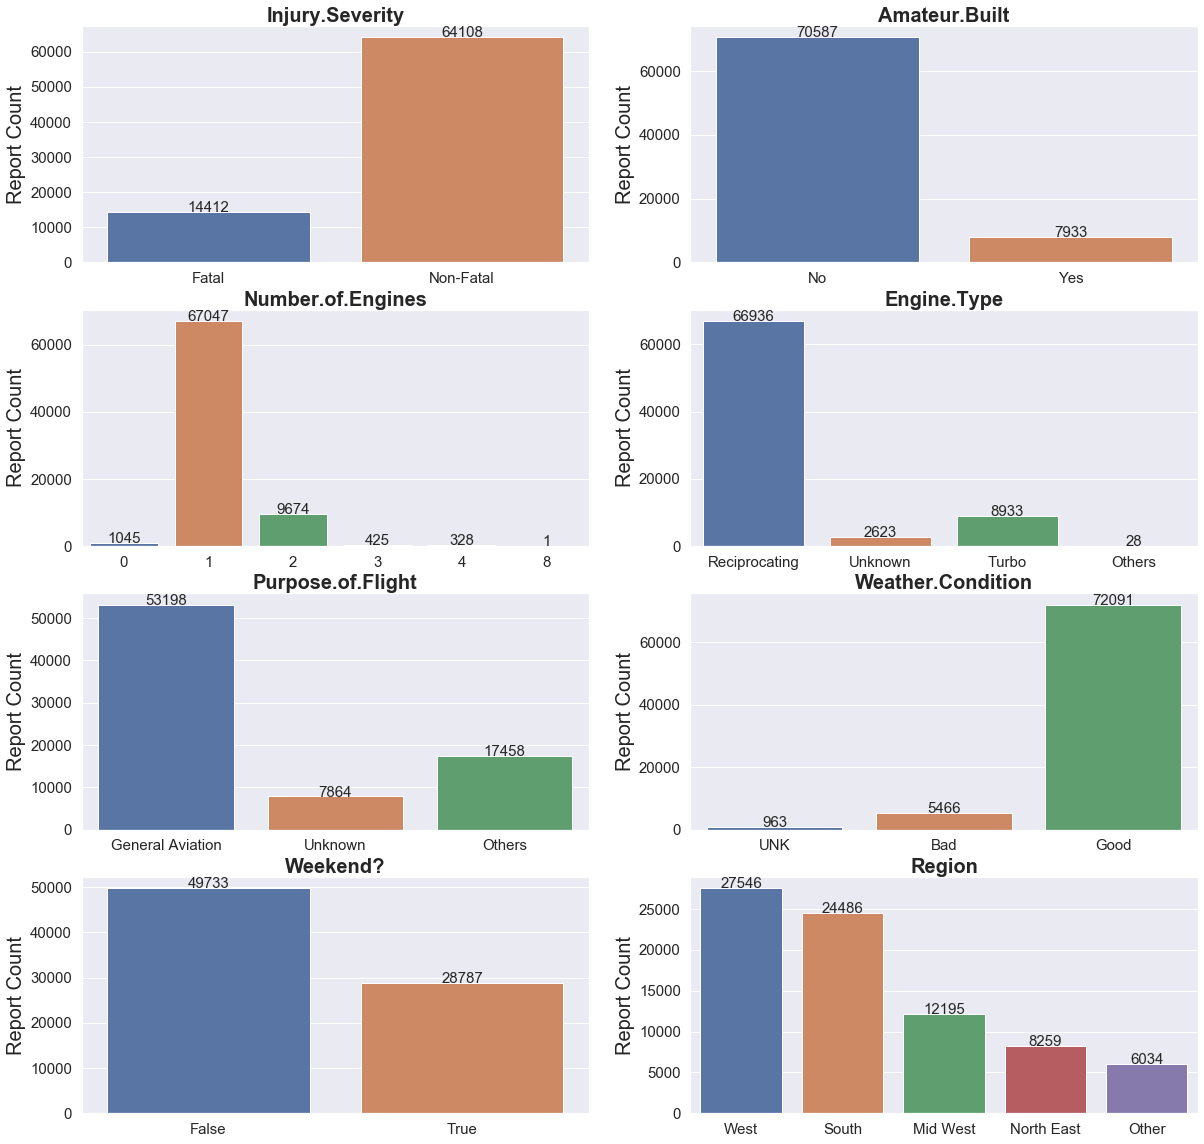

In [43]:
# Defining varaibles that can be fitted into subplots
variables_with_less_terms = ['Injury.Severity', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.Flight', \
               'Weather.Condition', 'Weekend?', 'Region']

# Count plots for each of the variables
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for variable, subplot in zip(variables_with_less_terms, ax.flatten()):
    graph = sb.countplot(x=variable, data=USData, ax=subplot)
    graph.text(x=0.5, y=1, s=graph.get_xlabel(), fontsize=20, weight='bold', ha='center', va='bottom',\
               transform=graph.transAxes)
    graph.set_xlabel('')
    graph.set_ylabel('Report Count',fontsize=20)
    graph.tick_params(labelsize=15)
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", size = 15)
    

#### Injury Severity
It is heartening to see that most of the reports are non-letal in nature. But this is not surprising, considering it is an important mode of transport nowadays. So the flight safety standards are definitely high.

#### Amateur Built
Most of the reports are on commerically produced aircrafts, which make sense, because that takes up majority of airtraffic.

#### Number of Engines
The figure shows that most reports are produced by aircrafts with 1 engine, which may be concerning. But readers should feel better knowing that most commercial aircrafts nowdays come with mostly 2, some 4 engines. 1 engine aircrafts belongs to very old models and amateur built models. Considering how that's the most flied aircrafts, but yet experiences signiciant lower report counts than 1 engine models, it shows that the aircrafts nowadays are much safer than the older models. 
https://www.usatoday.com/story/travel/flights/todayinthesky/2017/10/09/airlines-two-engines-better-than-four/703581001/

#### Engine Type
Most of the reports are from reciprocating type of engines, which makes sense because they are more complex machines than turbo engines. Reciprocating engines have many more parts, and they are moving parts. Thus they are more likely to experience breakdowns than turbo engines. 

#### Purpose of Flight
Most of the reports are from general aviation. This makes sense because that's the bulk of all aviation travels. Higher frequency of flight yields higher frequency of accidents.

#### Weather Condition
Most of the reports are during good weathers. Which is surprising, considering how common logic should suggest otherwise. But thinking deeper, it actually makes sense, since bad weathers occurs much less frequently than good weathers. So, the frequency of reports should therefore be higher during good weathers. 

#### Weekend?
Non-Weekend reporting is higher than weekend reporting. Which should be because overall frequency of flying is higher during weekdays, thus overall accident reports goes up. 

#### Region
The region with the most number of reports is the West, probably because of the mountainous terrain, such as the Rocky Mountains. This makes it more challenging for pilots to navigate, hence, resulting in higher chance of accidents happening.  
https://www.census.gov/prod/1/gen/95statab/preface.pdf

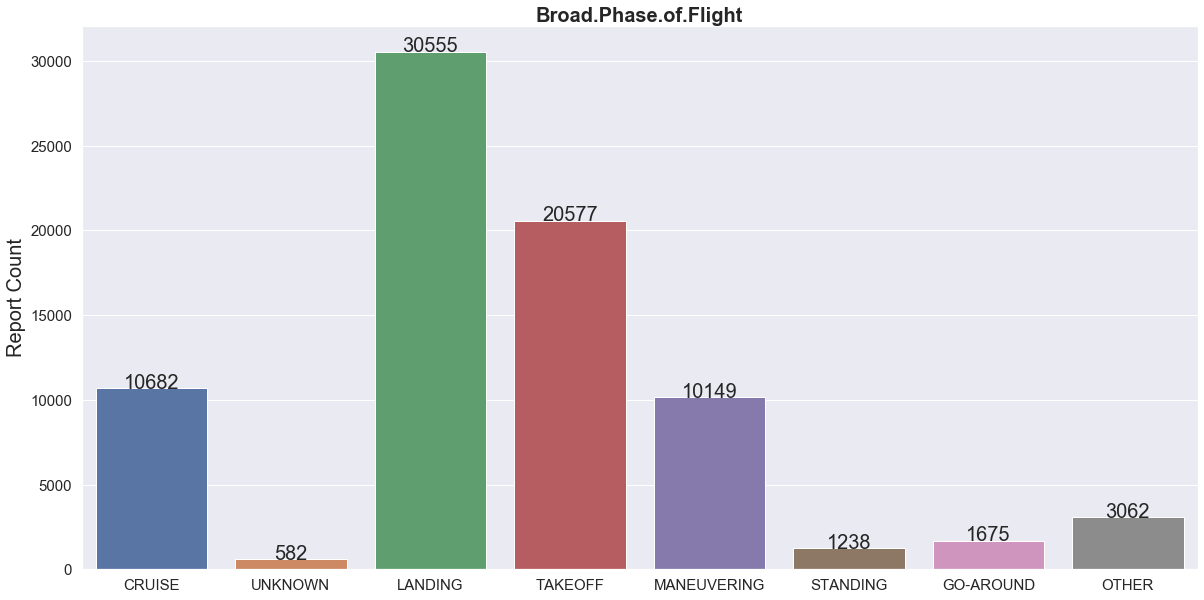

In [44]:
# Count plot for variable that cannot fit in subplots
variables_with_more_terms = 'Broad.Phase.of.Flight'
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
graph = sb.countplot(x=variables_with_more_terms, data=USData)
graph.text(x=0.5, y=1, s=graph.get_xlabel(), fontsize=20, weight='bold', ha='center', va='bottom',\
               transform=graph.transAxes)
graph.set_xlabel('')
graph.set_ylabel('Report Count',fontsize=20)
graph.tick_params(labelsize=15)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", size = 20)

Landing and takeoff accounts for the bulk of all accidents reported. This means that accidents are more likely to happen on ground, than offground. Which is not surprising considering how there's more factors that can potentially damage the aircraft on land. 

Not surprisingly, landing seems to cause the most number of cases, which coincides with statistics reported by the news. https://science.howstuffworks.com/transport/flight/modern/reasons-commercial-airplanes-crash1.htm

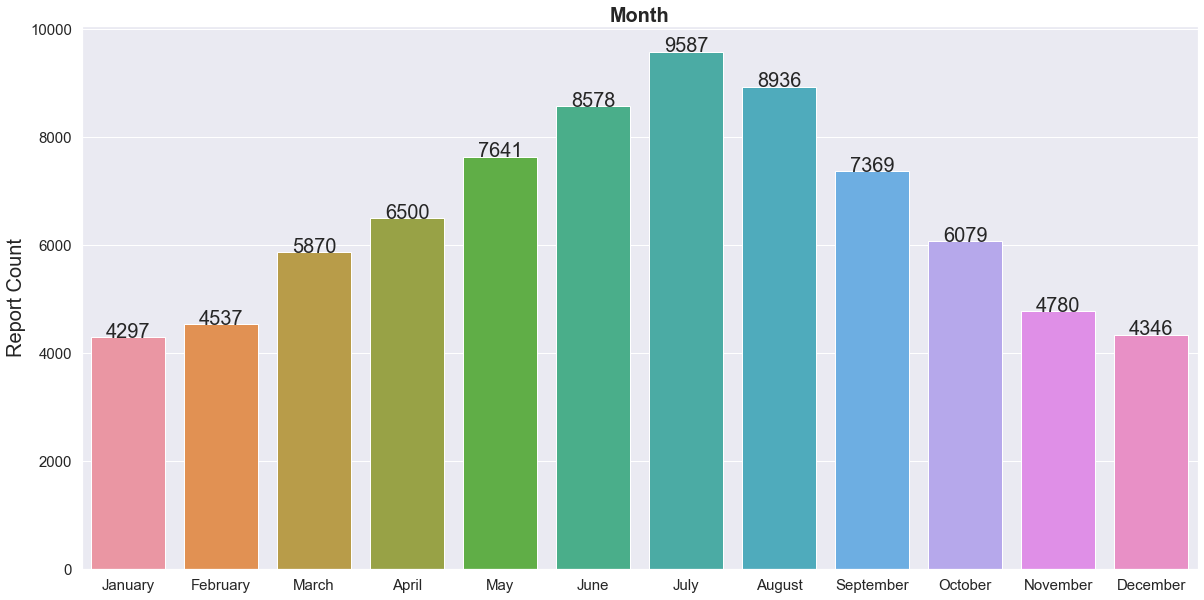

In [45]:
# x-axis labels
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",\
               "November", "December"]

# Count plot for variable that cannot fit in subplots
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
graph = sb.countplot(x='Month', data=USData, order=month_names)
graph.text(x=0.5, y=1, s=graph.get_xlabel(), fontsize=20, weight='bold', ha='center', va='bottom',\
               transform=graph.transAxes)
graph.set_xlabel('')
graph.set_ylabel('Report Count',fontsize=20)
graph.tick_params(labelsize=15)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", size = 20)

Interesting to see that the number of accidents/incidents actually peeks during the middle of the year, behaving almost like a bellcurve. 

July have the highest number of accidents, probably because that is the peak travel period due to the summer holidays. With more planes in the sky and higher frequency of flying for the pilots, there is a higher chance for accidents to happen, as reflected by the graph.

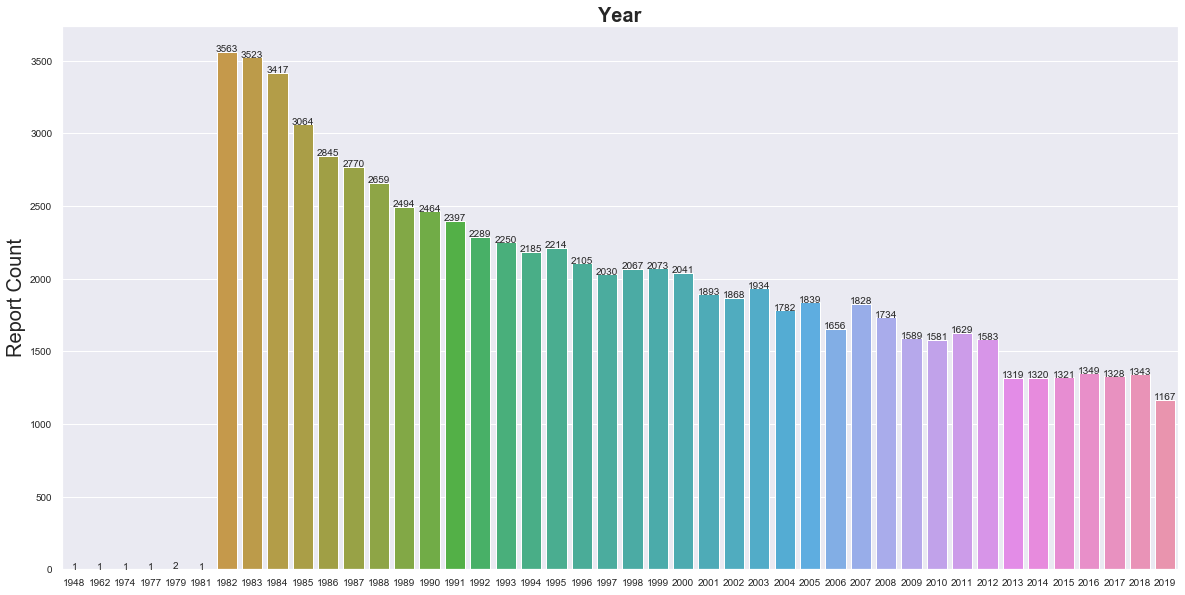

In [46]:
# Count plot for variable that cannot fit in subplots
import matplotlib.dates as mdates
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
graph = sb.countplot(x='Year', data=USData)
graph.text(x=0.5, y=1, s=graph.get_xlabel(), fontsize=20, weight='bold', ha='center', va='bottom',\
               transform=graph.transAxes)
graph.set_xlabel('')
graph.set_ylabel('Report Count',fontsize=20)
graph.tick_params(labelsize=10)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", size = 10)

Overall decreaseing trend. This is probably due to improvements in aviation technology through the years, which made air travel much more reliable and safer.
Furthermore, requirements to get a license has became much more refined through the years, producing safer pilots.
One thing to note is the lack of injuries in years 1948 to 1981. This is most likely due to bad data collection.

# Analysis using Bivariate Analysis

#### To better visualise the data, we decided to make a new dataframe 'Percentage.of.Fatalities'.
But we will still use the original binary values of 'fatal' and 'non-fatal' for the machine learning stage because that fits flight personnel problem statement better.

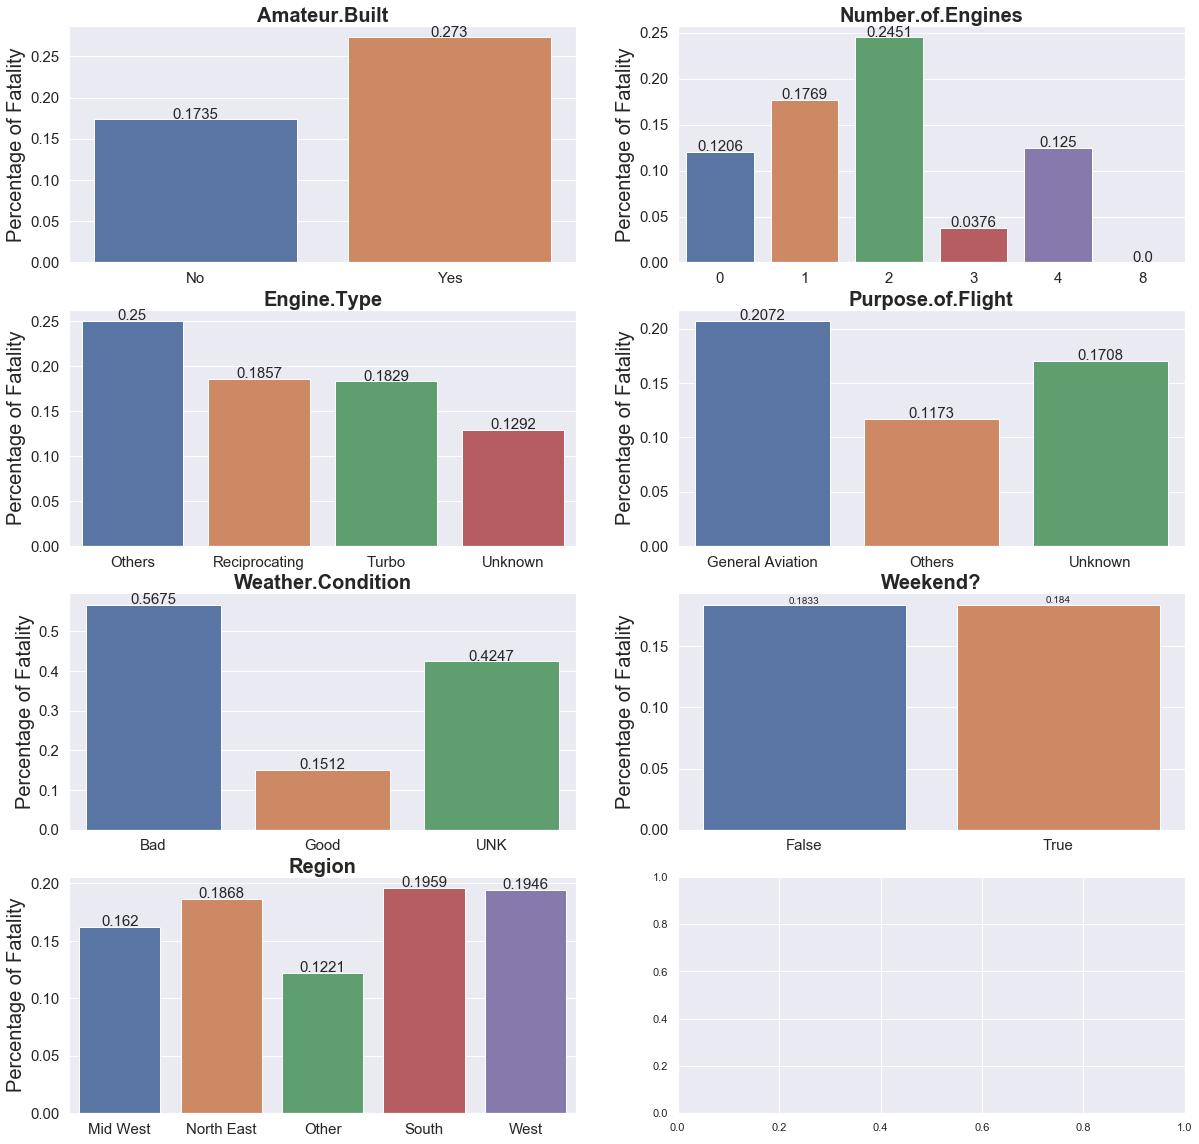

In [47]:
# Defining varaibles that can be fitted into subplots
variables_with_less_terms = ['Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.Flight', \
               'Weather.Condition', 'Weekend?', 'Region']

fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# Create multiple dataframes to calculate percentage of fatality tailored to every variable
for variable, subplot in zip(variables_with_less_terms, ax.flatten()):
    fatal = pd.DataFrame(USData[variable])
    fatal['Fatal.Count'] = USData['Injury.Severity'][USData['Injury.Severity']=='Fatal']
    fatal = fatal.dropna()
    fatal = fatal.groupby([variable]).agg({'Fatal.Count': 'count'})

    non_fatal = pd.DataFrame(USData[variable])
    non_fatal['Non-Fatal.Count'] = USData['Injury.Severity'][USData['Injury.Severity']=='Non-Fatal']
    non_fatal = non_fatal.dropna()
    non_fatal = non_fatal.groupby([variable]).agg({'Non-Fatal.Count': 'count'})

    percent = pd.concat([fatal,non_fatal], axis = 1)
    percent['Percent'] = percent['Fatal.Count']/(percent['Fatal.Count']+percent['Non-Fatal.Count'])
    percent.fillna(0, inplace = True) 
    
    # Barplots for each variable against percentage of fatality
    if (variable == 'Weekend?'):
        graph = sb.barplot(x=percent.index.astype(str), y='Percent', data=percent, ax=subplot)
        graph.text(x=0.5, y=1, s=graph.get_xlabel(), fontsize=20, weight='bold', ha='center', va='bottom',\
               transform=graph.transAxes)
        graph.set_xlabel('')
        graph.set_ylabel('Percentage of Fatality',fontsize=20)
        graph.tick_params(labelsize=15)
        
        for p in graph.patches:
            height = p.get_height()
            graph.text(p.get_x()+p.get_width()/2., height+0.001, round(height,4), ha="center", size = 10)
        continue
        
    graph = sb.barplot(x=percent.index, y='Percent', data=percent, ax=subplot)
    graph.text(x=0.5, y=1, s=graph.get_xlabel(), fontsize=20, weight='bold', ha='center', va='bottom',\
               transform=graph.transAxes)
    graph.set_xlabel('')
    graph.set_ylabel('Percentage of Fatality',fontsize=20)
    graph.tick_params(labelsize=15)
    
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height+0.001, round(height,4), ha="center", size = 15)

#### Amateur Built
As expected, amateur built planes resulted in a higher percentage of fatality than non-amateur built planes. Given the lack of regulation, and inexcessibility of appropriate materials, these aircrafts are usually contracted out of less rigid and poorly designed components. The safety standards of these are likely to be much than professionally aircrafts. Hence, when accidents do happen, these aircrafts are likely to be more heavily damaged, and the chances of survival are lower.

#### Number of Engines
Aircrafts with 2 engines produced the highest fatality  rate among different categories. This is quite concerning, considering how even though 2 engine aircrafts experience lesser reports, the severity of those reports are in fact higher. This also means, that even with two engines, the likelyhood of a fatal accident is no lesser than that of 1 engine. 

Alternatively, this also means that although 1 engine aircrafts produces the most reports, the damage caused is not as severe, likely due to the fact that it is a minor fault in the machine. 

#### Engine Type
The two most commonly used engine types (reciprocating, turbo), actually produced similar percentage of fatality. This seems to suggest that although turbo engines are less likely to breakdown, but when it does breakdown, the consequences are likely to be detrimental.

#### Purpose of Flight
The highest chance of fatality comes from general aviation, which comes as no surprise, considering how this is the most frequent of air travels.

#### Weather Condition
Bad weather seems to produce the worst fatality rate. This makes sense since extreme flight conditions are often detrimental to the pilot's control of the plane. So, the accidents will naturally tend to be more serious and less survivable.

#### Weekend?
The fatality rate of weekend vs non-weekend days are very similar. With suggests that there is likely to be no effect of day of week on chances of accidents. 

#### Region
North East, South and West Regions all have fatality rates. This makes sense because these are the areas with the highest density of flights. So, the likelyhood of an accident happening is higher in these states.
https://championtraveler.com/news/flyover-states-flight-data-shows-which-states-americans-think-are-boring/

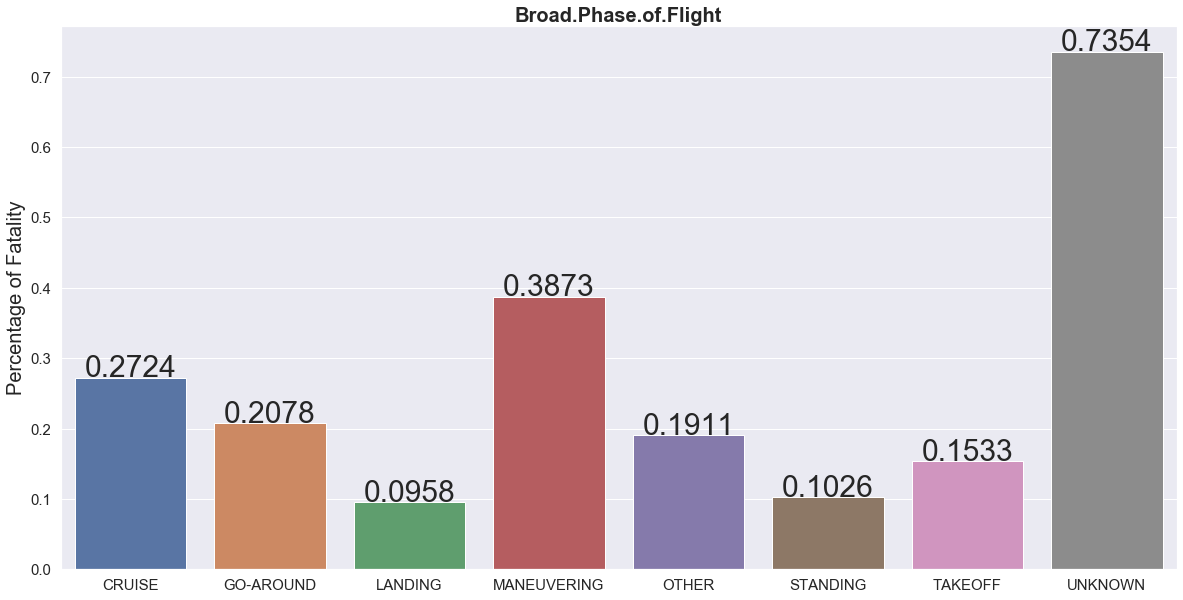

In [48]:
variables_with_more_terms = 'Broad.Phase.of.Flight'

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Create a dataframe to calculate percentage of fatality tailored to this variable
fatal = pd.DataFrame(USData[variables_with_more_terms])
fatal['Fatal.Count'] = USData['Injury.Severity'][USData['Injury.Severity']=='Fatal']
fatal = fatal.dropna()
fatal = fatal.groupby([variables_with_more_terms]).agg({'Fatal.Count': 'count'})

non_fatal = pd.DataFrame(USData[variables_with_more_terms])
non_fatal['Non-Fatal.Count'] = USData['Injury.Severity'][USData['Injury.Severity']=='Non-Fatal']
non_fatal = non_fatal.dropna()
non_fatal = non_fatal.groupby([variables_with_more_terms]).agg({'Non-Fatal.Count': 'count'})

percent = pd.concat([fatal,non_fatal], axis = 1)
percent['Percent'] = percent['Fatal.Count']/(percent['Fatal.Count']+percent['Non-Fatal.Count'])
percent.fillna(0, inplace = True) 

# Bar plot for variable that cannot fit in subplots
graph = sb.barplot(x=percent.index, y='Percent', data=percent)
graph.text(x=0.5, y=1, s=graph.get_xlabel(), fontsize=20, weight='bold', ha='center', va='bottom',\
           transform=graph.transAxes)
graph.set_xlabel('')
graph.set_ylabel('Percentage of Fatality',fontsize=20)
graph.tick_params(labelsize=15)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height+0.001, round(height,4), ha="center", size = 30)

Ignoring 'Unknown', the phase of flight that results in the highest percentage of fatal accidents is maneuvering the aircraft in air. This is likely because, thats when pilots are most likely to lose control of the plane, either due to change in air current or unforseen events such as bird strikes.

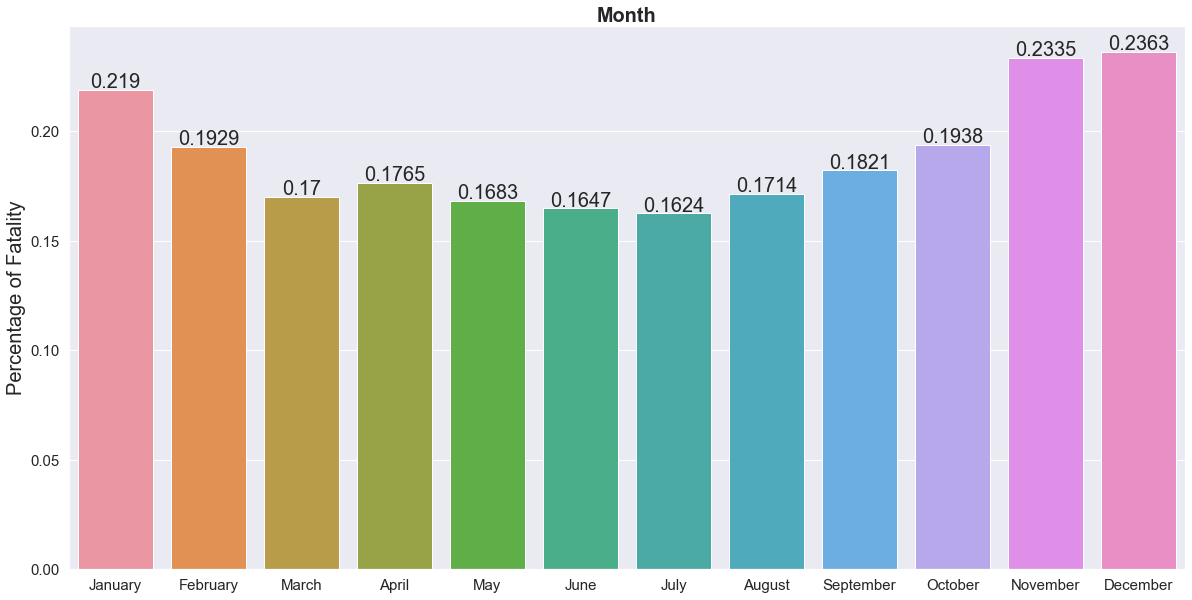

In [49]:
# x-axis labels
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",\
               "November", "December"]

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Create a dataframe to calculate percentage of fatality tailored to this variable
fatal = pd.DataFrame(USData['Month'])
fatal['Fatal.Count'] = USData['Injury.Severity'][USData['Injury.Severity']=='Fatal']
fatal = fatal.dropna()
fatal = fatal.groupby(['Month']).agg({'Fatal.Count': 'count'})

non_fatal = pd.DataFrame(USData['Month'])
non_fatal['Non-Fatal.Count'] = USData['Injury.Severity'][USData['Injury.Severity']=='Non-Fatal']
non_fatal = non_fatal.dropna()
non_fatal = non_fatal.groupby(['Month']).agg({'Non-Fatal.Count': 'count'})

percent = pd.concat([fatal,non_fatal], axis = 1)
percent['Percent'] = percent['Fatal.Count']/(percent['Fatal.Count']+percent['Non-Fatal.Count'])
percent.fillna(0, inplace = True) 

# Bar plot for variable that cannot fit in subplots
graph = sb.barplot(x=percent.index, y='Percent', data=percent, order=month_names)
graph.text(x=0.5, y=1, s=graph.get_xlabel(), fontsize=20, weight='bold', ha='center', va='bottom',\
           transform=graph.transAxes)
graph.set_xlabel('')
graph.set_ylabel('Percentage of Fatality',fontsize=20)
graph.tick_params(labelsize=15)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height+0.001, round(height,4), ha="center", size = 20)

This plot suggests that the percentage of fatality is highest among the colder months (January, November, December). This is forseeable because those are the months with the worst weather conditions. The colder weather may fog up the windows of the cockpit, which severely hinders vision. Resulting in a higher chance for pilots to make mistakes.  

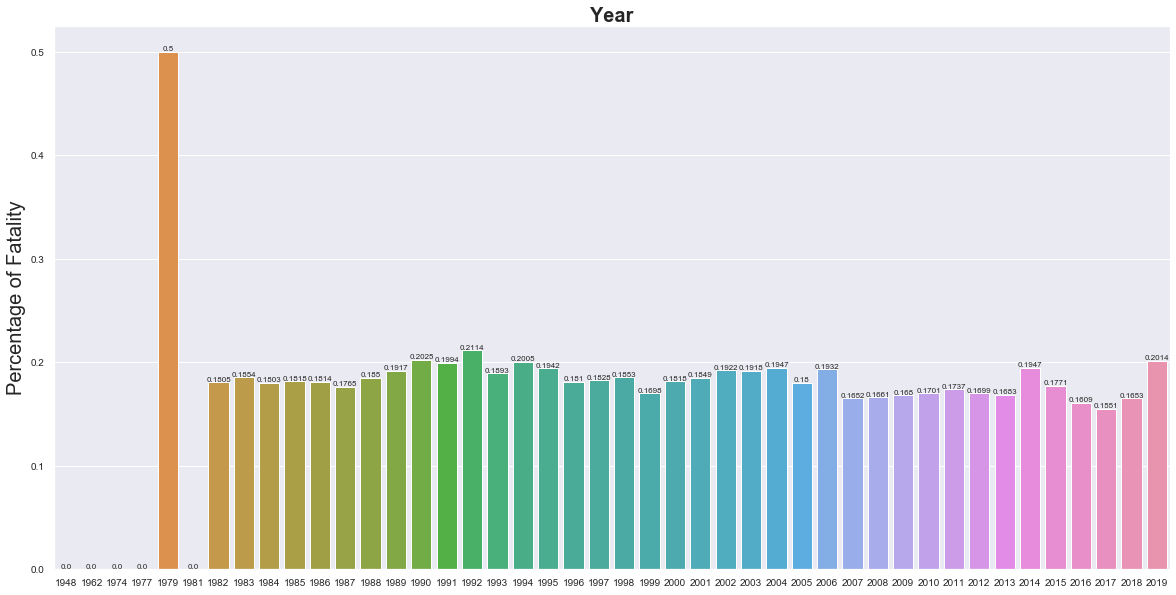

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Create a dataframe to calculate percentage of fatality tailored to this variable
fatal = pd.DataFrame(USData['Year'])
fatal['Fatal.Count'] = USData['Injury.Severity'][USData['Injury.Severity']=='Fatal']
fatal = fatal.dropna()
fatal = fatal.groupby(['Year']).agg({'Fatal.Count': 'count'})

non_fatal = pd.DataFrame(USData['Year'])
non_fatal['Non-Fatal.Count'] = USData['Injury.Severity'][USData['Injury.Severity']=='Non-Fatal']
non_fatal = non_fatal.dropna()
non_fatal = non_fatal.groupby(['Year']).agg({'Non-Fatal.Count': 'count'})

percent = pd.concat([fatal,non_fatal], axis = 1)
percent['Percent'] = percent['Fatal.Count']/(percent['Fatal.Count']+percent['Non-Fatal.Count'])
percent.fillna(0, inplace = True) 

# Bar plot for variable that cannot fit in subplots
graph = sb.barplot(x=percent.index, y='Percent', data=percent)
graph.text(x=0.5, y=1, s=graph.get_xlabel(), fontsize=20, weight='bold', ha='center', va='bottom',\
           transform=graph.transAxes)
graph.set_xlabel('')
graph.set_ylabel('Percentage of Fatality',fontsize=20)
graph.tick_params(labelsize=10,length=6)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height+0.001, round(height,4), ha="center", size = 8)

Excluding 1979 (due to the lack of data, which skews the results), the percentage of fatality does not seem to be much different across the years. This may be good news for commuters, considering now there are now less cases of fatal accidents, even with more aircrafts in the sky. But it may also be bad news for manufacturers because it suggests that even with advancement in technologies, if an accident was to happen, the chances of it being fatal has not reduced. 

<a id='Conclusion_for_this_problem'></a>
# Conclusion for this problem

We first used Univariate Analysis to find the central tendancies of the data and the spread of the data. By doing so we uncovered insights into various features - the lethality of plane crashes, for example.

A major point of interest is the analysis of the `Broad.Phase.of.Flight` variable. We saw through the exploration of this variable that the highest proportion of accidents occurred while landing.

This tells passengers that they need to be more concerned about flight safety during the landing phase as compared to the other phases. This being said, we went on to conduct Bivariate Analysis for the features against `Percentage of Fatality` and discovered that although a higher number of accidents occur during landing, the number of fatalities of accidents that happen during this phase is the lowest among the features.

What this means for the passengers is that although they should be concerned about the flight safety during landing, if they are concerned about loss of life alone, there is less chance of having fatalities. Through the analysis, we can also conclude that there are more accidents that happen during the middle of the year, passengers can take this into account as well.

Aircraft managers should note the high percentage of fatalities during maneuvering, when asking the question 'How safe and reliable are our machines?'. The data clearly shows that their flights are less equipped to safeguard lives of passengers during the maneuvering phase. 

Aircraft managers would also be interested in the fact that the highest number of accidents happen during the landing phase. They could take these point into account when modelling and controlling safety measures for planes in the future.

Both groups should be happy to note however, that the number of accidents has been decreasing overall, over the years, a fact we could attribute to the advancement in technology and aviation methodology.

# Solving the flight personnel problem:

    Airport personnels: Should the aircraft takeoff given the current situation?
    Passengers: Is it safe to fly today?
    
    
To make our study more robust, we decided to compare the effectiveness of 4 different multi-variate classification models (Decision tree, logistic regression, Random forest, Gradient Boosted Random Forest)
to see which is the best at modelling whether a flight accident is likely to be fatal or not.

In [51]:
# Import libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [52]:
# Defining multivariate model predictors
predictors = ['Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.Flight', 'Broad.Phase.of.Flight',\
               'Weather.Condition', 'Weekend?', 'Month', 'Year', 'Region']

# Convert 'Injury Severity' variable to numeric
y = pd.DataFrame(USData['Injury.Severity'].astype('category'))
y.reset_index(drop=True, inplace=True)
y['Injury.Severity'] = y['Injury.Severity'].cat.codes

# Convert Predictor Variables to numeric
X = pd.DataFrame(USData[predictors].astype('category')) 
X.reset_index(drop=True, inplace=True)
for column in predictors:
    X[column] = X[column].cat.codes

Checked to ensure no collinarity, which will prevent the model from working properly. https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python

In [53]:
# Credit to Max Ghenis
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=3.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])

In [54]:
# Discard multicollinear variables
calculate_vif_(X)

Remaining variables:
Index(['Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.Flight', 'Broad.Phase.of.Flight', 'Weather.Condition',
       'Weekend?', 'Month', 'Year', 'Region'],
      dtype='object')


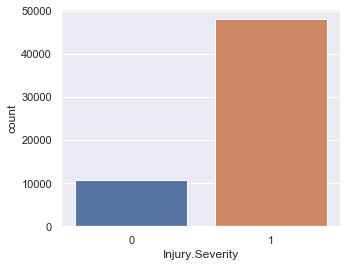

In [55]:
# Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Visualising the split
f, axes = plt.subplots(1, 1, figsize=(5, 4))
sb.countplot(y_train["Injury.Severity"])

<a id='Models'></a>
# Binary Tree

In [56]:
# Import libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [57]:
# Train the model
dectree = DecisionTreeClassifier(max_depth = 6)  
dectree.fit(X_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8395143487858719

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8343861436576668



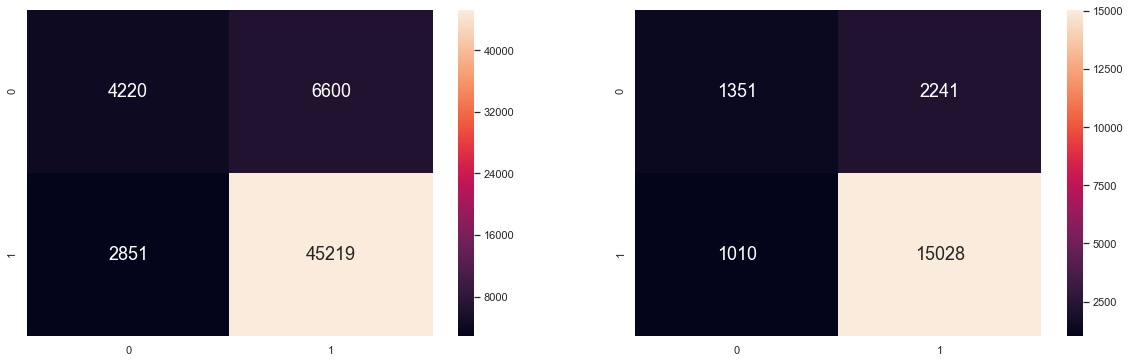

In [58]:
# Predict using the model
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit of Test Data
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.754


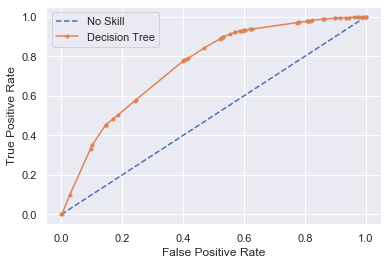

In [59]:
# Calculate probabilities
lr_probs = dectree.predict_proba(X_test)

# Keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## Logistic Regression

In [60]:
# Import libraries 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [61]:
# Train the model 
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Goodness of Fit of Logistic Regression Model 	Train Dataset
Classification Accuracy 	: 0.828052300899983

Goodness of Fit of Logistic Regression Model 	Test Dataset
Classification Accuracy 	: 0.8272542027508915



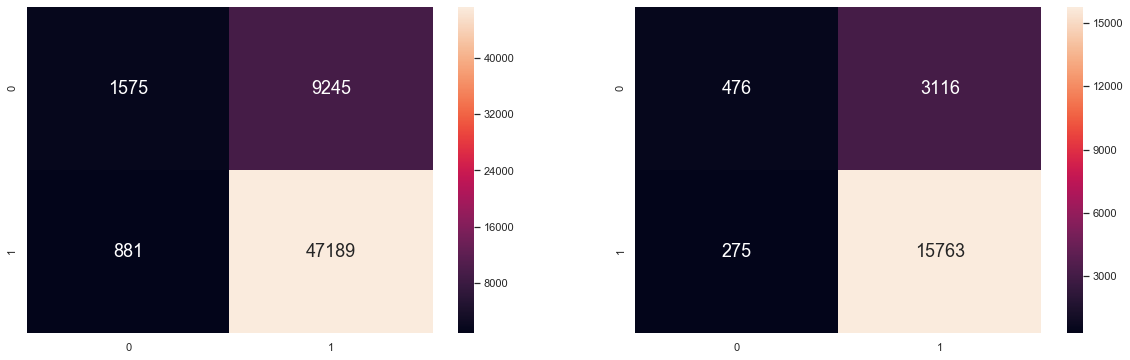

In [62]:
# Predict using the model 
logreg_y_train_pred = logreg.predict(X_train)
logreg_y_test_pred = logreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Logistic Regression Model \tTrain Dataset")
print("Classification Accuracy \t:", logreg.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Logistic Regression Model \tTest Dataset")
print("Classification Accuracy \t:", logreg.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.heatmap(confusion_matrix(y_train, logreg_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, logreg_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.645


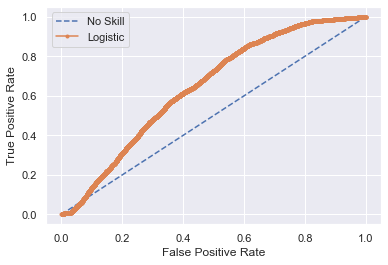

In [63]:
# Calculate probabilities
lr_probs = logreg.predict_proba(X_test)

# Keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# Random Forest

In [64]:
# Import libraries 
from sklearn.ensemble import RandomForestClassifier

In [65]:
# Train the model
randforest = RandomForestClassifier(max_depth=6, n_estimators=100)
randforest.fit(X_train, y_train.values.ravel()) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8346748174562744

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8323993886907795



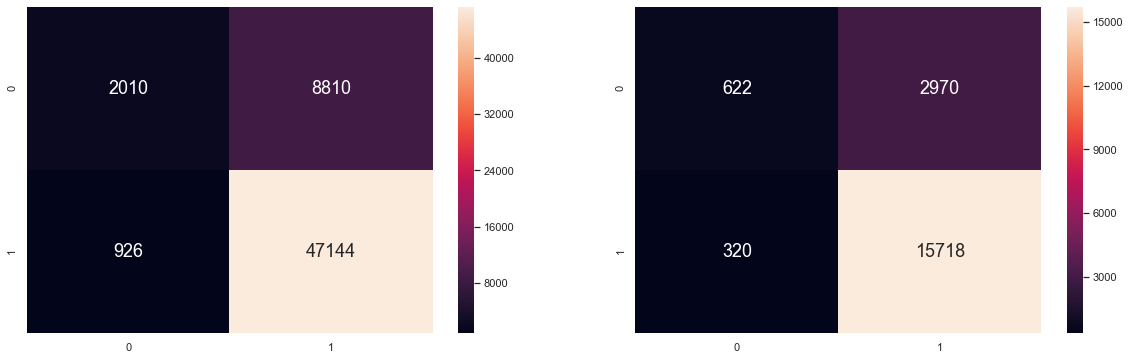

In [66]:
# Predict using the model 
randforest_y_train_pred = randforest.predict(X_train)
randforest_y_test_pred = randforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", randforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", randforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.heatmap(confusion_matrix(y_train, randforest_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, randforest_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.767


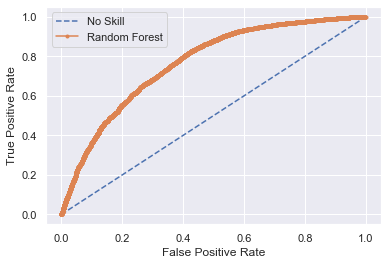

In [67]:
# Calculate probabilities
lr_probs = randforest.predict_proba(X_test)

# Keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# Gradient Boosted Random Forest 

In [68]:
# Import libraries 
import sys
!{sys.executable} -m pip install xgboost

from xgboost import XGBClassifier

In [69]:
# Train the model 
gradforest = XGBClassifier(max_depth=6, n_estimators=100)
gradforest.fit(X_train, y_train.values.ravel()) 

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8573102394294447

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8367804381049414



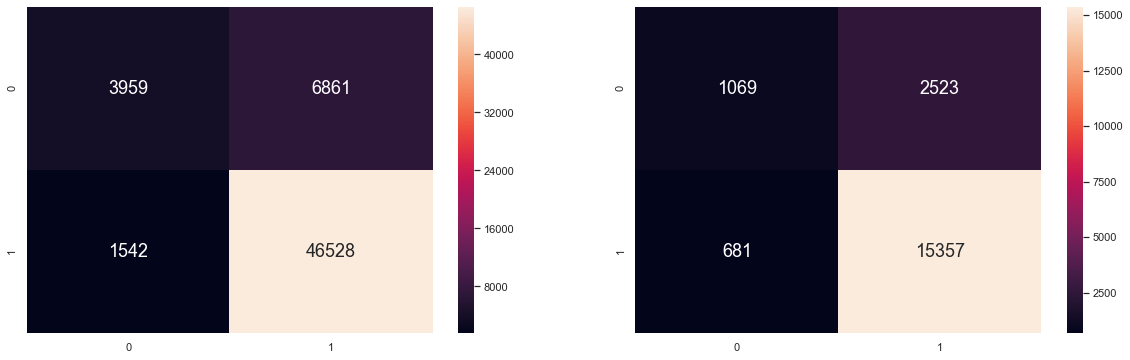

In [70]:
# Predict using the model 
gradforest_y_train_pred = gradforest.predict(X_train)
gradforest_y_test_pred = gradforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gradforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gradforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.heatmap(confusion_matrix(y_train, gradforest_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, gradforest_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.767


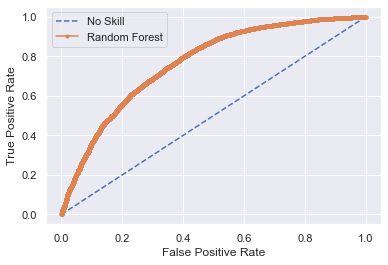

In [71]:
# Calculate probabilities
lr_probs = gradforest.predict_proba(X_test)

# Keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# Comparing the four models

After comparing the accuracy of the four models, it seems like the gradient boosted decision random forest have the best accuracy, justified by having the highest AUC value.
<br>
However, what was surprising was how well a single decision tree fared against the other more complicated algorithms. 


At first the team assumed that by not limiting the depth, it will increase the accuracy of the model. But along the way, we realised the models seem to be getting less accurate with more depths and hence decided to limit it to 6.
<br>
We decided to run another experiment to test if this was only applicable to single decision tree or otherwise.

In [72]:
#Defining the models
models = [LogisticRegression(solver='lbfgs', max_iter=1000), 
          DecisionTreeClassifier(max_depth=6), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=6, n_estimators=100), 
          RandomForestClassifier(max_depth=None, n_estimators=100), 
          XGBClassifier(max_depth=6, n_estimators=100), 
          XGBClassifier(max_depth=None, n_estimators=100)]

AUC=[0,0,0,0,0,0,0]

for index, model in enumerate(models):
    # Train the model
    model.fit(X_train, y_train.values.ravel())
    
    # Calculate probabilities
    lr_probs = model.predict_proba(X_test)
    
    # Keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    ns_probs = [0 for _ in range(len(y_test))]
    
    # Calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    
    # Summarize scores
    AUC[index] = roc_auc_score(y_test, lr_probs)
    
# Display results
model_titles = ['Logistic Regression', 
                'Decision Tree - max depth 6', 
                'Decision Tree - no max depth',
                'Random Forest - max depth 6', 
                'Random Forest - no max depth', 
                'Gradient Boosted Random Forest - max depth 6',
                'Gradient Boosted Random Forest - no max depth']

for auc, model in zip(AUC, model_titles):
    print('%-60s:%.3f' % (model, auc))

Logistic Regression                                         :0.645
Decision Tree - max depth 6                                 :0.754
Decision Tree - no max depth                                :0.610
Random Forest - max depth 6                                 :0.768
Random Forest - no max depth                                :0.714
Gradient Boosted Random Forest - max depth 6                :0.767
Gradient Boosted Random Forest - no max depth               :0.767


# Conclusion for this problem

Noteworthy is that not specifying max depth for the trees will always result in a lower accuracy for the model. This was puzzling so we decided to do some research and found out that this could be due to over-fitting.

Over-fitting is the phenomenon in which the model fits the training data so well that it is inaccurate in predicting the outcomes of the test data.

In decision trees, when 'max_depth' parameter is not specified, the tree will be designed to perfectly fit all samples in the training data set. Thus, this ends up with branches with strict rules of sparse data resulting in bad fitting of test data and more importantly, low accuracy. 

We also discovered that this overfitting phenomenon also contributed to the comparatively lower classification accuracy (approx. 0.2 lower than other models) for our Logistic Regression model. This is mainly due to the high variable count leading to high probability of overfitting for this model (a limitation). As such, we would exclude this model when we are concluding this project. 

<br>

As shown above, __gradient boosted random forest produced the best model__, following closely behind is Random Forest - max depth 6 and Decision Tree - max depth 6.

So, flight personnels should adopt this model if they want to predict injury severity via classification models.

# Solving the passenger problem:
    Passengers: I'm about to take a plane, is it safe to fly today? 

To answer this problem, we would want to find out which factors are most useful in classifying Injurity Severity.

We are using feature importance (a metric to calculate factor importance for decision tree, random forest and gradient boosted forests) to determine what factors are most useful in classifying Injury Severity.

We shall not look into the logistic regression model because that model is as accurate as the other models.

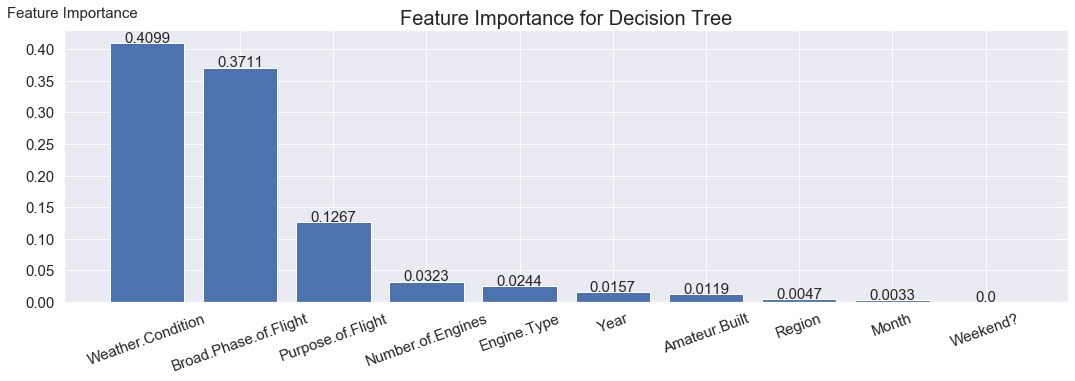

In [73]:
# Calculate feature importances
dectree_important = dectree.feature_importances_

# Sort feature importances in descending order
dectree_indices = np.argsort(dectree_important)[::-1]

# Rearrange feature names so they match the sorted feature importances
dectree_names = [predictors[i] for i in dectree_indices]

# Graph Barplot
f, axes = plt.subplots(1, 1, figsize=(18, 5))
graph = plt.bar(range(X.shape[1]), dectree_important[dectree_indices])

plt.xticks(range(X.shape[1]), dectree_names, rotation=20, fontsize = 15)
plt.yticks(fontsize = 15)
plt.text(-1.5, 0.45,'Feature Importance',fontsize = 15)
for p in graph.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+0.001, round(height,4), ha="center", size = 15)

plt.title("Feature Importance for Decision Tree", fontsize = 20)

plt.show()

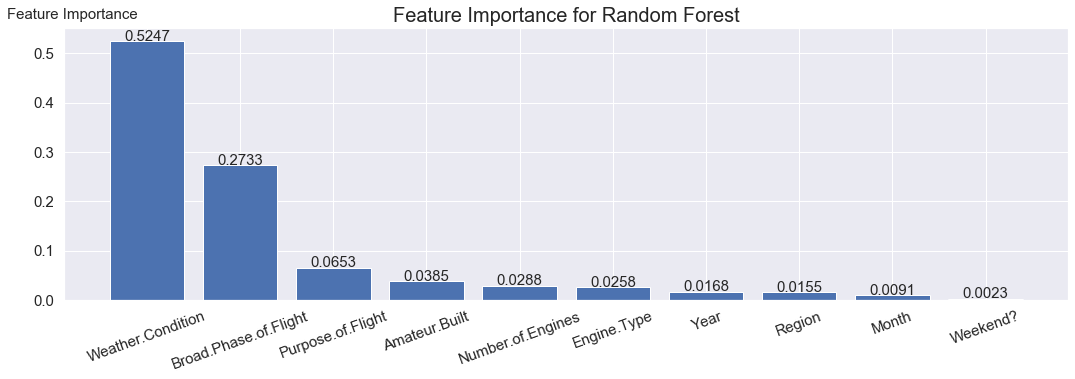

In [74]:
# Calculate feature importances
randforest_important = randforest.feature_importances_

# Sort feature importances in descending order
randforest_indices = np.argsort(randforest_important)[::-1]

# Rearrange feature names so they match the sorted feature importances
randforest_names = [predictors[i] for i in randforest_indices]

# Graph Barplot
f, axes = plt.subplots(1, 1, figsize=(18, 5))
graph = plt.bar(range(X.shape[1]), randforest_important[randforest_indices])

plt.xticks(range(X.shape[1]), randforest_names, rotation=20, fontsize = 15)
plt.yticks(fontsize = 15)
plt.text(-1.5, 0.57,'Feature Importance',fontsize = 15)
for p in graph.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+0.001, round(height,4), ha="center", size = 15)

plt.title("Feature Importance for Random Forest", fontsize = 20)

plt.show()

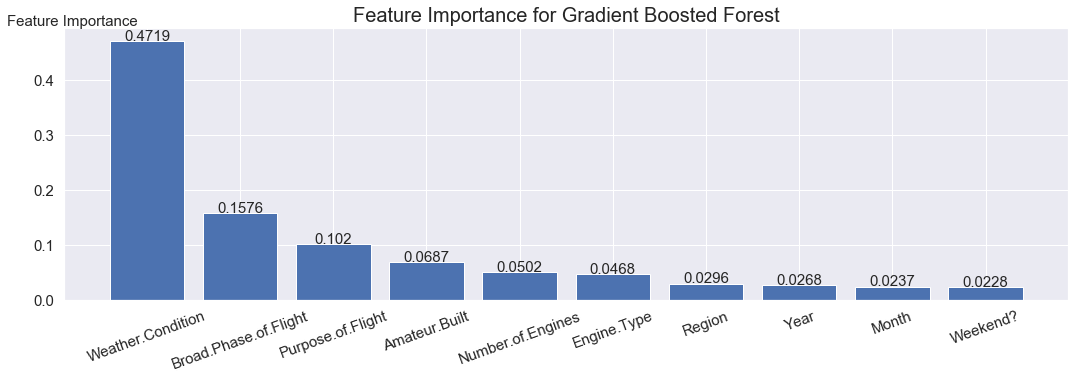

In [75]:
# Calculate feature importances
gradforest_important = gradforest.feature_importances_

# Sort feature importances in descending order
gradforest_indices = np.argsort(gradforest_important)[::-1]

# Rearrange feature names so they match the sorted feature importances
gradforest_names = [predictors[i] for i in gradforest_indices]

# Graph Barplot
f, axes = plt.subplots(1, 1, figsize=(18, 5))
graph = plt.bar(range(X.shape[1]), gradforest_important[gradforest_indices])

plt.xticks(range(X.shape[1]), gradforest_names, rotation=20, fontsize = 15)
plt.yticks(fontsize = 15)
plt.text(-1.5, 0.5,'Feature Importance',fontsize = 15)
for p in graph.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+0.001, round(height,4), ha="center", size = 15)

plt.title("Feature Importance for Gradient Boosted Forest", fontsize = 20)

plt.show()

In [76]:
#RFE is another metric used for logistic regression
#keep?
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 1)
rfe = rfe.fit(X_train, y_train.values.ravel())

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False False False]
[ 2  4  6  3  7  1  8  9 10  5]


# Conclusion for this problem

From the feature importance from the decision tree, random forest and gradient boosted forest models, we can deduce that the factor that largely influenced our models is weather condition (which matches scientific evidence as stormy weather is deemed dangerous for flying), followed by broad phase of flight a moderate degree, then purpose of flight to a small degree. After which, the other factors shared similar low weightage in importance and are not important for passengers when determining flight safety.

So, the simplest way a passenger can tell the how safe a flight is is via the __Weather Condition__. A flight in good weather conditions are much safer than those that are not.

## Binary Tree with oversampling of data

In [77]:
from sklearn.utils import resample
y_train['Injury.Severity'].value_counts()

1    48070
0    10820
Name: Injury.Severity, dtype: int64

In [78]:
# Merge train data into one set
os_train_data = pd.concat([X_train, y_train], axis=1)

# Separate the classes
if len(os_train_data[os_train_data['Injury.Severity']== 0]) < len(os_train_data[os_train_data['Injury.Severity']== 1]):
    short = os_train_data[os_train_data['Injury.Severity']== 0]
    long = os_train_data[os_train_data['Injury.Severity']== 1]

elif len(os_train_data[os_train_data['Injury.Severity']== 1]) < len(os_train_data[os_train_data['Injury.Severity']== 0]):
    short = os_train_data[os_train_data['Injury.Severity']== 1]
    long = os_train_data[os_train_data['Injury.Severity']== 0]

#oversample the minority class
short_upsampled = resample(short,
                           replace=True, # sample with replacement
                           n_samples=len(long), # match number in class w class of greater number
                           random_state=27) # create reproducible results

#join oversampled minority class and majority class
upsampled = pd.concat([long, short_upsampled])
upsampled['Injury.Severity'].value_counts()

1    48070
0    48070
Name: Injury.Severity, dtype: int64

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6980237154150197

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7497707590422822



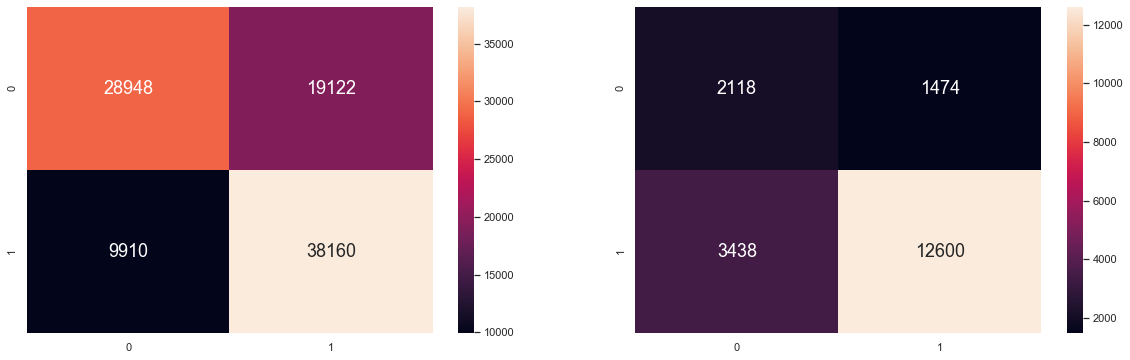

In [79]:
os_y_train = pd.DataFrame(upsampled['Injury.Severity'])
os_X_train = pd.DataFrame(upsampled[['Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.Flight',\
                                 'Broad.Phase.of.Flight', 'Weather.Condition', 'Weekend?', 'Month', 'Year', 'Region']])

# Train the model
os_dectree = DecisionTreeClassifier(max_depth = 6)  
os_dectree.fit(os_X_train, os_y_train)  

# Predict using the model
os_y_train_pred = os_dectree.predict(os_X_train)
os_y_test_pred = os_dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", os_dectree.score(os_X_train, os_y_train))
print()

# Check the Goodness of Fit of Test Data
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", os_dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.heatmap(confusion_matrix(os_y_train, os_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, os_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

<a id='Limitation'></a>
# Limitations
However, given the current data, although we are able to provide an important factor (Weather Condition) to predict the aviation accidents. We are missing out on another significant factors to consider, such as the human factor. This involve many sub factors such as

Human factor:
*   Training / Proficiency of pilot
*   Number of flights/experiences of the pilot
*   Pilot condition before the flight (Eg. fatigue level)
*   Other possible human errors

Atmospheric Conditions:
* Air density
* Wind speed and direction

Natural Calamities:
* Earthquakes that are destructive to key aviation facilities.
* Volcanic Eruptions that 

The role of the pilot plays an important part when ensuring a safe flight. As the data reflects that majority of the aviation accident occurs during the landing and takeoff phase, such phase requires most of the pilot's control. Similarly, we do not have sufficient data on other key metrics mentioned above. Planes taking off at airports at a higher altitude, for example, require a longer runway for takeoff, due to the lower air density. This directly increases the chance for human error during takeoff too. Natural calamities alter flight conditions drastically too, changing visibility and possibly affecting engine health.

<a id='Future_Improvements'></a>
# Future Improvements
In order to further improve the data accuracy, more data from multiple datasets can be considered.



1.   Pilot's years of proficiency,
2.   Pilot's total number of flights flown,
3.   Pilot's age,
4.   Pilot's health condition,
5.   Atmospheric Pressure at time of crash,
6.   Wind direction at time of crash,
7.   Wind speed at the time of crash,\
and other such factors.

Other than the possible factors in aviation accidents mentioned above, we can also consider these followings to be included for better accuracy.



1.   Analysing data from the past 10 - 15 years only,
2.   Seperating the lastest models of aircrafts from old models.

As technology has undertaken huge leaps and bounds over the years, the capabilities of newer aircrafts are different too. We could not, fairly, compare the planes that we are using now with planes that were used in the past. There are too many differences in past and current technologies.

For our model to be truly reliable, we have to adjust features that are used, to accomodate all these factors. We need to also take into account the advancement in technology in future models to ensure that the predictions and results that we gather are relevant for use in the future.

<a id='Overall_Conclusion/_Key_takeaways'></a>
# Overall Conclusion/ Key takeaways
Aviation and air transport becomes more of a necessity each day, as we move into a world that is highly interconnected and fast-paced. Therefore, it is important for us to use data science and analysis to learn from the past aviation accidents. With the help of data science, we are able to analyse an enormous amount of data with little effort. 

Furthermore, through pattern recognition, we will be able to identify the majority of the factors that are causing aviation accidents. This allows preventive measures to be taken against such factors. 

Lastly, with machine learning and algorithm formulation, it is possible to create AI that are able to prevent accidents and protect human life. 